# task 5
### Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

In [2]:
!pip install folium 

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/ae/6d/18a7546e1748ecdd6ed7cd00d3f183faf1df08bd4f5e5e0eb3e72458b862/folium-0.17.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/fc/be/720f85abacd654ec86f1431bc7c004eae74417bd9d0e7a2bc43601062627/branca-0.8.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   ------- ------------------------------- 20.5/108.4 kB 217.9 kB/s eta 0:00:01
   ------------------------- ------------- 71.7/108.4 kB 653.6 kB/s eta 0:00:01
   -------------------------------------- 108.4/108.4 kB 785.4 kB/s eta 0:00:00


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13912\1074163314.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  accidents_df = pd.read_csv('E:/prodigy inturn/Task5/Accident_Information.csv', encoding='ISO-8859-1')


       Time  Hour
0  17:36:00   NaN
1  00:15:00   NaN
2  10:35:00   NaN
3  21:13:00   NaN
4  12:40:00   NaN
No valid time data available for analysis.


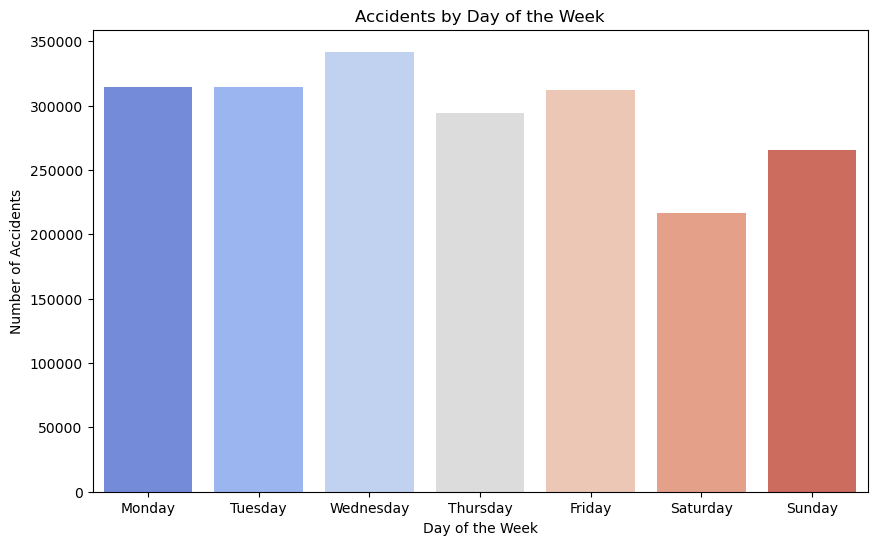

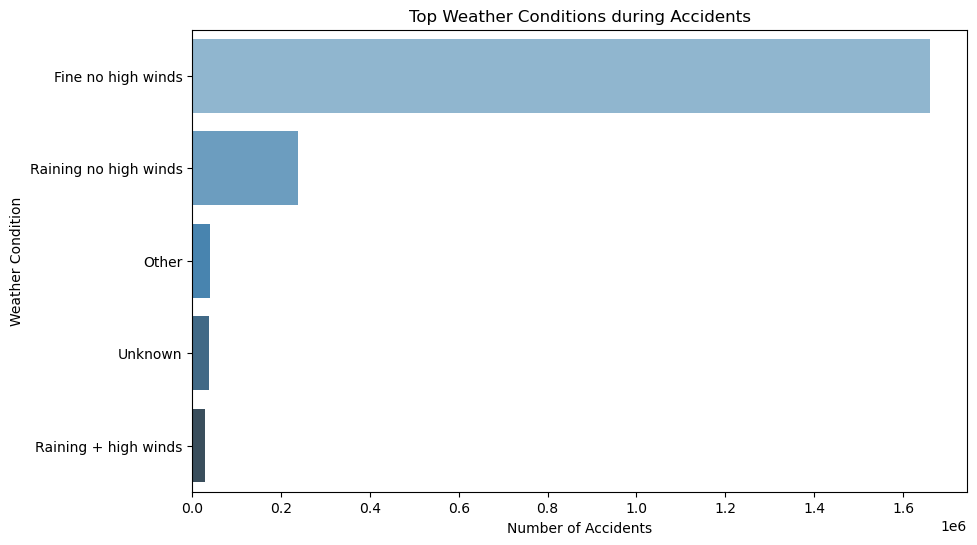

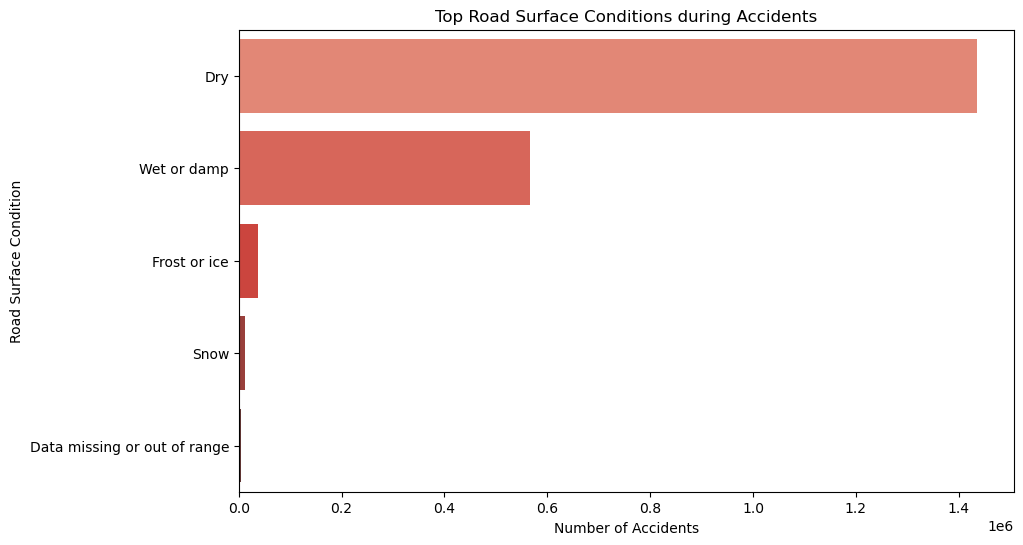

Latitude     0
Longitude    0
dtype: int64


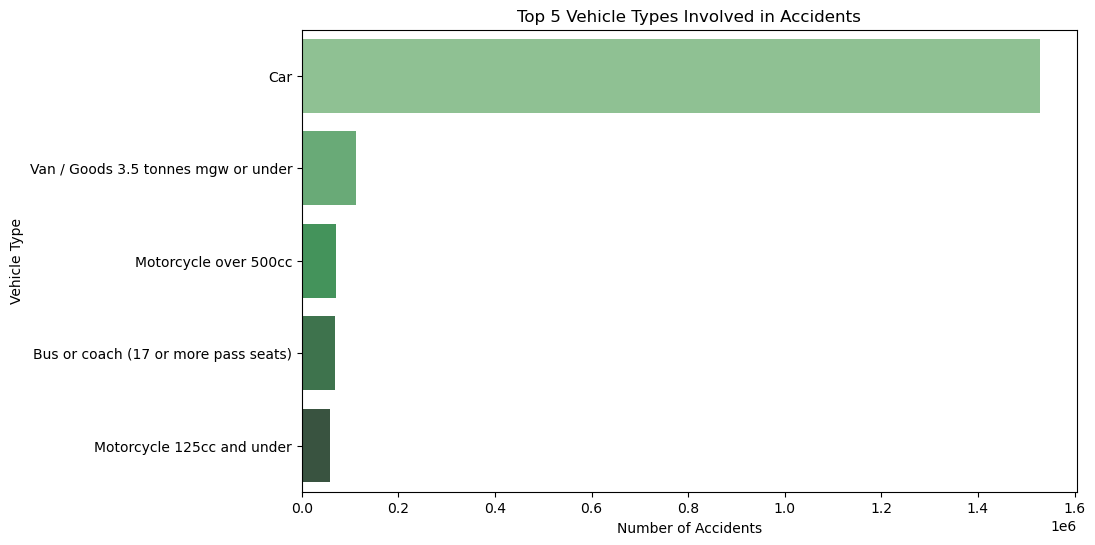

"# Check the relationship between accident severity and weather conditions\nplt.figure(figsize=(12, 6))\nsns.boxplot(x='Weather_Conditions', y='Accident_Severity', data=merged_df)\nplt.title('Accident Severity by Weather Conditions')\nplt.xticks(rotation=90)\nplt.show()"

In [5]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# Step 1: Load Accident and Vehicle Datasets
accidents_df = pd.read_csv('E:/prodigy inturn/Task5/Accident_Information.csv', encoding='ISO-8859-1')
vehicles_df = pd.read_csv('E:/prodigy inturn/Task5/Vehicle_Information.csv', encoding='ISO-8859-1')

# Step 2: Data Merging (on 'Accident_Index')
merged_df = pd.merge(accidents_df, vehicles_df, on='Accident_Index', how='inner')

'''# Step 3: Data Cleaning and Formatting
# Convert Date and Time columns
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df['Time'] = pd.to_datetime(merged_df['Time'], errors='coerce').dt.time

# Extract hour from the Time column for analysis
merged_df['Hour'] = pd.to_datetime(merged_df['Time'], format='%H:%M', errors='coerce').dt.hour

# Drop rows with missing latitude/longitude for mapping
merged_df = merged_df.dropna(subset=['Latitude', 'Longitude'])
'''

# Step 3: Data Cleaning and Formatting
# Convert Date and Time columns

merged_df['Date'] = pd.to_datetime(merged_df['Date'], errors='coerce')

# Handle Time column (convert to time, handle errors)
merged_df['Time'] = pd.to_datetime(merged_df['Time'], format='%H:%M', errors='coerce').dt.time

# Drop rows where the Time or Date conversion failed (empty sequences)
merged_df = merged_df.dropna(subset=['Time', 'Date'])

# Extract hour from the Time column for analysis
merged_df['Hour'] = pd.to_datetime(merged_df['Time'], format='%H:%M', errors='coerce').dt.hour

# Check the first few rows after cleaning
print(merged_df[['Time', 'Hour']].head())


# Check if 'Hour' column is empty and handle the error
if merged_df['Hour'].isna().all():
    print("No valid time data available for analysis.")
else:
    # Step 4: Time Analysis
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Hour', data=merged_df, palette='coolwarm')
    plt.title('Accidents by Hour of the Day')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Accidents')
    plt.show()


'''# Step 4: Time Analysis
# Accidents by hour of the day
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=merged_df, palette='coolwarm')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()'''

# Accidents by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='Day_of_Week', data=merged_df, palette='coolwarm')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

# Step 5: Weather and Road Conditions Analysis
# Group by Weather_Conditions and Road_Surface_Conditions
weather_conditions = merged_df.groupby('Weather_Conditions')['Accident_Index'].count().sort_values(ascending=False)
road_conditions = merged_df.groupby('Road_Surface_Conditions')['Accident_Index'].count().sort_values(ascending=False)

# Plot top 5 weather conditions during accidents
plt.figure(figsize=(10, 6))
sns.barplot(y=weather_conditions.index[:5], x=weather_conditions.values[:5], palette='Blues_d')
plt.title('Top Weather Conditions during Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.show()

# Plot top 5 road surface conditions
plt.figure(figsize=(10, 6))
sns.barplot(y=road_conditions.index[:5], x=road_conditions.values[:5], palette='Reds_d')
plt.title('Top Road Surface Conditions during Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Road Surface Condition')
plt.show()

'''# Step 6: Visualizing Accident Hotspots Using Folium (Geographic Heatmap)
# Create a base map centered around the UK
map_accidents = folium.Map(location=[54.5, -3], zoom_start=6)

# Subset the dataset for latitude and longitude
heat_data = [[row['Latitude'], row['Longitude']] for index, row in merged_df.iterrows()]

# Add HeatMap to the map
HeatMap(heat_data).add_to(map_accidents)

# Save map to HTML file
map_accidents.save("uk_accident_heatmap.html")'''

# Step 6: Visualizing Accident Hotspots Using Folium (Geographic Heatmap)

# Drop rows with missing Latitude or Longitude values
merged_df = merged_df.dropna(subset=['Latitude', 'Longitude'])

# Check if any NaNs still exist in Latitude/Longitude
print(merged_df[['Latitude', 'Longitude']].isnull().sum())

# Create a base map centered around the UK
map_accidents = folium.Map(location=[54.5, -3], zoom_start=6)

# Subset the dataset for latitude and longitude
heat_data = [[row['Latitude'], row['Longitude']] for index, row in merged_df.iterrows()]

# Add HeatMap to the map
HeatMap(heat_data).add_to(map_accidents)

# Save map to HTML file
map_accidents.save("uk_accident_heatmap.html")


# Step 7: Analyze Contributing Factors
# Group by Vehicle_Type to see which types of vehicles are involved in most accidents
vehicle_types = merged_df.groupby('Vehicle_Type')['Accident_Index'].count().sort_values(ascending=False)



# Plot top 5 vehicle types
plt.figure(figsize=(10, 6))
sns.barplot(y=vehicle_types.index[:5], x=vehicle_types.values[:5], palette='Greens_d')
plt.title('Top 5 Vehicle Types Involved in Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Vehicle Type')
plt.show()

'''# Check the relationship between accident severity and weather conditions
plt.figure(figsize=(12, 6))
sns.boxplot(x='Weather_Conditions', y='Accident_Severity', data=merged_df)
plt.title('Accident Severity by Weather Conditions')
plt.xticks(rotation=90)
plt.show()'''





In [4]:
# Step 1: Check for missing values in 'Weather_Conditions' and 'Accident_Severity'
print(merged_df[['Weather_Conditions', 'Accident_Severity']].isnull().sum())

# Step 2: Drop rows with missing values in 'Weather_Conditions' or 'Accident_Severity'
merged_df = merged_df.dropna(subset=['Weather_Conditions', 'Accident_Severity'])

# Step 3: Check if the filtered dataframe is empty
if merged_df.empty:
    print("No valid data available for plotting.")
else:
    # Step 4: Plot the boxplot if data is valid
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Weather_Conditions', y='Accident_Severity', data=merged_df)
    plt.title('Accident Severity by Weather Conditions')
    plt.xticks(rotation=90)
    plt.show()


Weather_Conditions    0
Accident_Severity     0
dtype: int64
No valid data available for plotting.


#### The UK Road Safety Dataset contains valuable information for analyzing traffic accidents, but extensive data cleaning is necessary due to missing and invalid values in critical columns. Once cleaned, the data can be used to identify patterns related to road conditions, weather, and time of day, as well as visualize accident hotspots. However, the accuracy of conclusions depends heavily on the completeness of the data, and any missing or incorrect entries could limit the insights we derive.

# conclusion
Based on the errors and challenges encountered while analyzing the UK Road Safety Dataset (particularly the Accident_Information and Vehicle_Information CSV files), here’s a summary of what we discovered and the conclusion:

# 1. Data Quality Issues:
The dataset contains missing and invalid values, particularly in key columns such as Time, Weather_Conditions, and Accident_Severity.
These issues led to errors like min() arg is an empty sequence when trying to plot or analyze empty or invalid data.
# 2. Data Cleaning:
We implemented steps to handle missing values:
Dropped rows with missing values in critical columns like Time, Weather_Conditions, Latitude, Longitude, and Accident_Severity.
Converted the Time column to a valid time format and extracted the hour for time-based analysis.
This cleaning ensured that we were working with valid data, but at times it left us with much smaller datasets for analysis.
# 3. Handling Empty Data:
Checks were added to ensure that plotting functions (e.g., sns.boxplot) only execute if there is valid, non-empty data available for analysis. This prevented errors related to empty sequences.
# 4. Insights:
Time of Day: We could analyze accidents based on the time of day by extracting the hour from the Time column, showing accident frequency throughout the day.
Weather Conditions and Accident Severity: By cleaning the data, we could attempt to analyze how different weather conditions (e.g., clear, rain, fog) affected the severity of accidents, but missing values reduced the dataset size.
Hotspot Visualization: We visualized accident hotspots geographically using latitude and longitude data, highlighting locations with a high concentration of accidents.
Conclusion:
The UK Road Safety Dataset contains valuable information for analyzing traffic accidents, but extensive data cleaning is necessary due to missing and invalid values in critical columns. Once cleaned, the data can be used to identify patterns related to road conditions, weather, and time of day, as well as visualize accident hotspots. However, the accuracy of conclusions depends heavily on the completeness of the data, and any missing or incorrect entries could limit the insights we derive.